In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('./insurance.csv')

In [2]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
#sex
le=LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex=le.transform(data.sex)
#smoker or not
le.fit(data.smoker.drop_duplicates())
data.smoker=le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates())
data.region=le.transform(data.region)

In [5]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

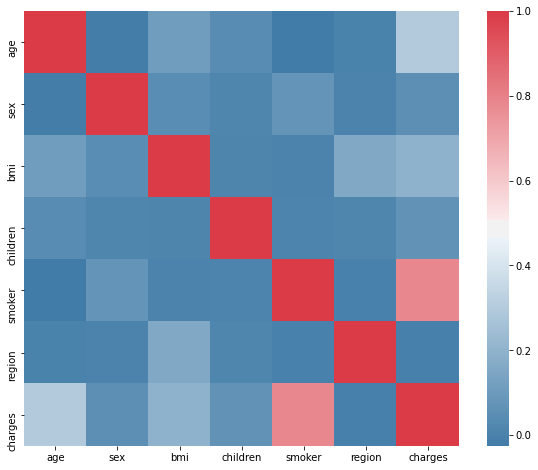

In [6]:
f, ax=pl.subplots(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(240,10,as_cmap=True),
           square=True, ax=ax)

In [7]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(gridplot([p],ncols = 2, plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

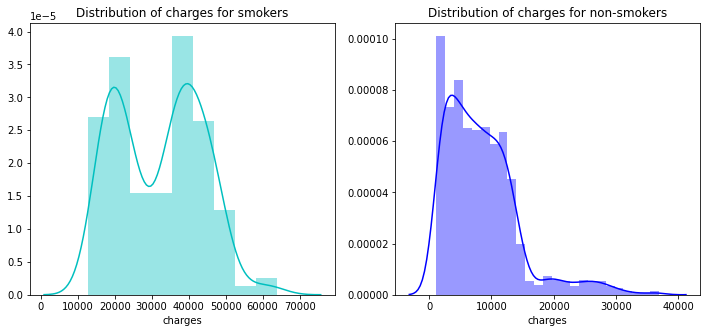

In [8]:
f=pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker==1)]['charges'],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker==0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

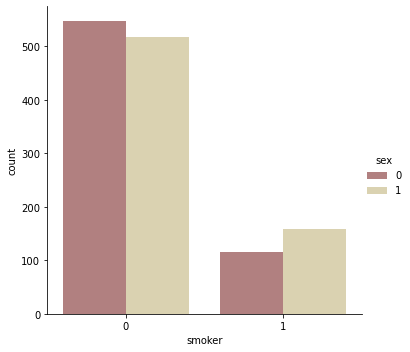

In [9]:
sns.catplot(x='smoker',kind='count',hue='sex',palette='pink',data=data)

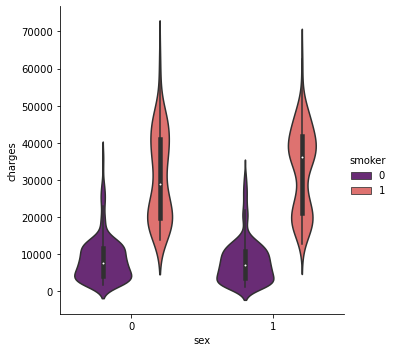

In [10]:
sns.catplot(x='sex',y='charges',hue='smoker',kind='violin',data=data,palette='magma')

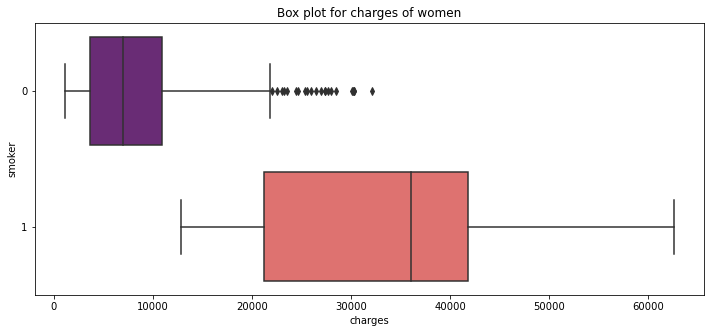

In [11]:
pl.figure(figsize=(12,5))
pl.title('Box plot for charges of women')
sns.boxplot(y='smoker',x='charges',data=data[(data.sex==1)],orient='h',palette='magma')

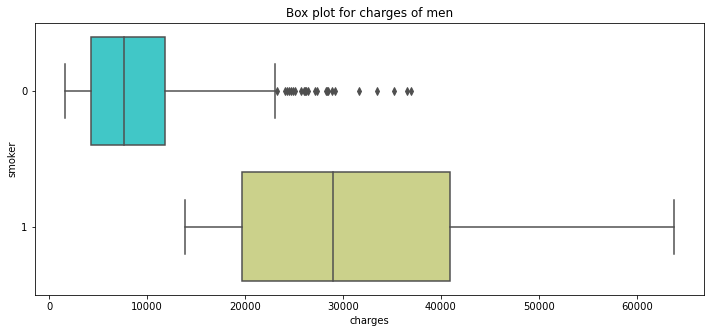

In [12]:
pl.figure(figsize=(12,5))
pl.title('Box plot for charges of men')
sns.boxplot(y='smoker',x='charges',data=data[(data.sex==0)],orient='h',palette='rainbow')

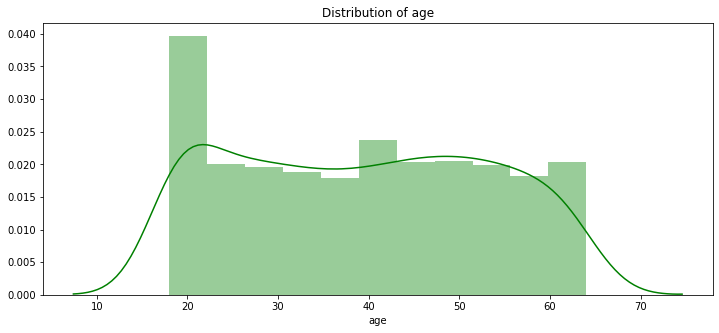

In [13]:
pl.figure(figsize=(12,5))
pl.title('Distribution of age')
ax=sns.distplot(data['age'],color='g')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

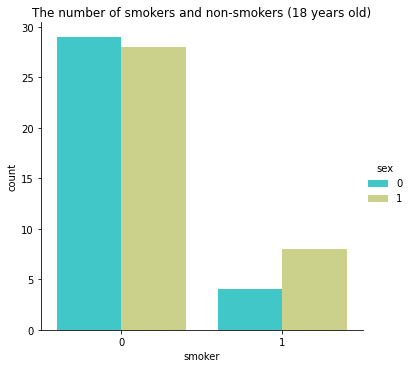

In [14]:
sns.catplot(x='smoker',kind='count',hue='sex',palette='rainbow',data=data[(data.age==18)])
pl.title('The number of smokers and non-smokers (18 years old)')

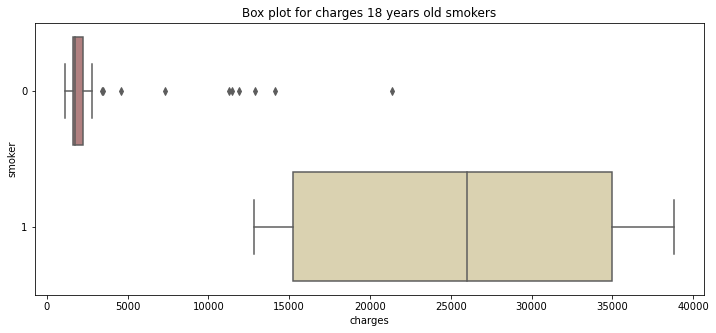

In [15]:
pl.figure(figsize=(12,5))
pl.title('Box plot for charges 18 years old smokers')
sns.boxplot(y='smoker',x='charges',data=data[(data.age==18)],orient='h',palette='pink')

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

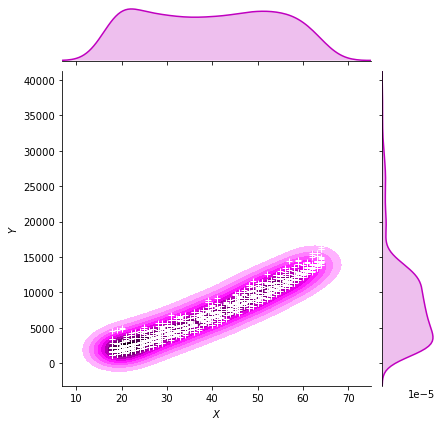

In [16]:
g=sns.jointplot(x='age',y='charges',data=data[(data.smoker==0)],kind='kde',color='m')
g.plot_joint(pl.scatter,c='w',s=30,linewidth=1,marker='+')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('$X$','$Y$')
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

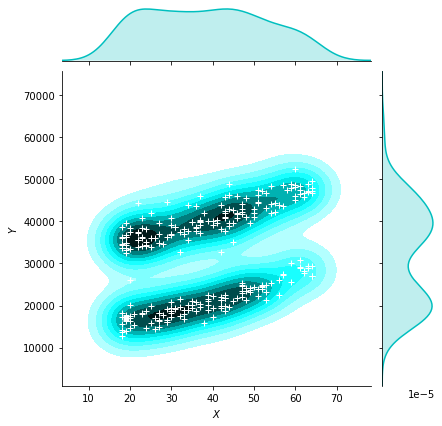

In [17]:
g=sns.jointplot(x='age',y='charges',data=data[(data.smoker==1)],kind='kde',color='c')
g.plot_joint(pl.scatter,c='w',s=30,linewidth=1,marker='+')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('$X$','$Y$')
ax.set_title('Distribution of charges and age for smokers')

In [18]:
#non-smokers
p=figure(plot_width=500,plot_height=450)
p.circle(x=data[(data.smoker==0)].age, y=data[(data.smoker==0)].charges,size=7,
        line_color='navy',fill_color='pink',fill_alpha=0.9)

show(p)

In [19]:
#smokers
p=figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker==1)].age, y=data[(data.smoker==1)].charges, size=7,
        line_color='navy',fill_color='red',fill_alpha=0.9)
show(p)

Text(0.5, 1.0, 'Smokers and non_smokers')

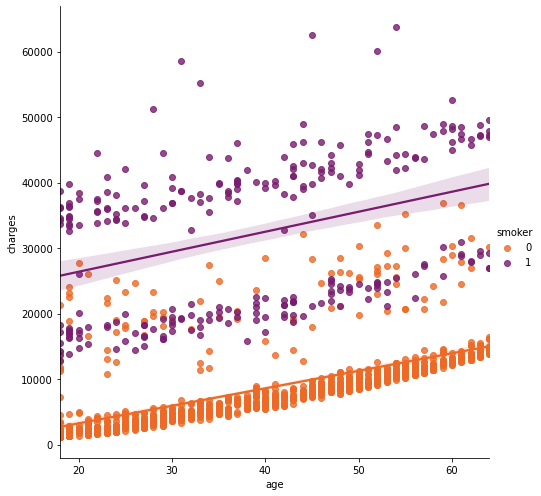

In [20]:
sns.lmplot(x='age',y='charges',hue='smoker',data=data,palette='inferno_r',size=7)
ax.set_title('Smokers and non_smokers')

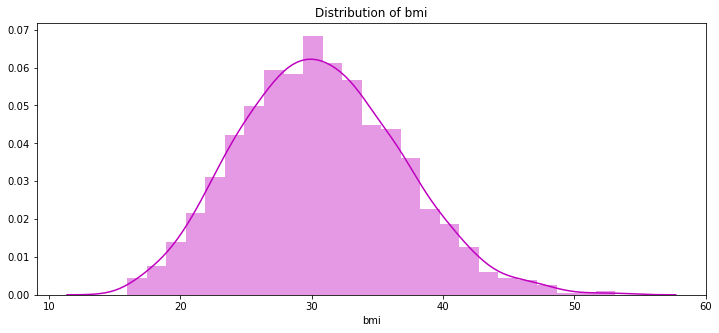

In [21]:
pl.figure(figsize=(12,5))
pl.title('Distribution of bmi')
ax=sns.distplot(data['bmi'],color='m')

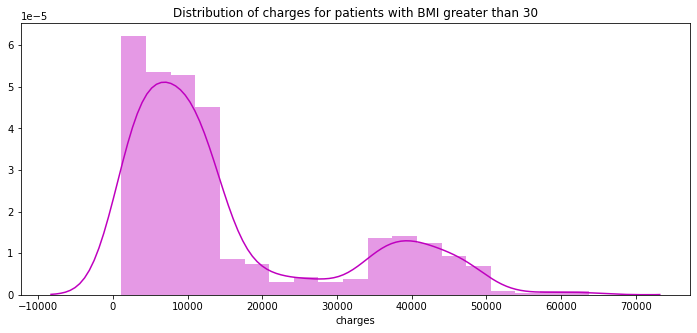

In [22]:
pl.figure(figsize=(12,5))
pl.title('Distribution of charges for patients with BMI greater than 30')
ax=sns.distplot(data[(data.bmi>=30)]['charges'],color='m')

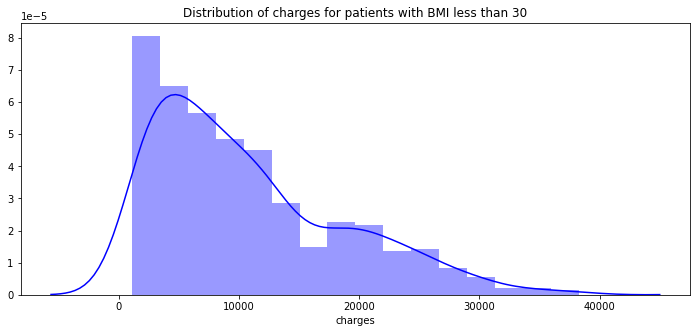

In [23]:
pl.figure(figsize=(12,5))
pl.title('Distribution of charges for patients with BMI less than 30')
ax=sns.distplot(data[(data.bmi<30)]['charges'],color='b')

Text(0.5, 1.0, 'Distribution of bmi and charges')

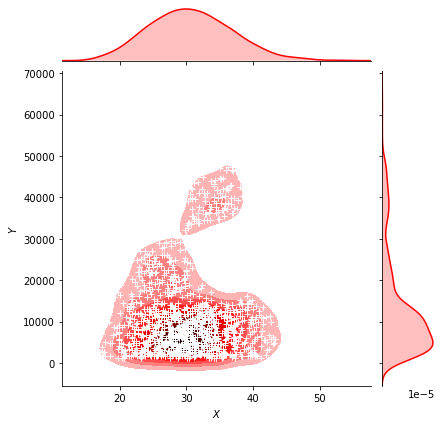

In [24]:
g=sns.jointplot(x='bmi',y='charges',data=data,kind='kde',color='r')
g.plot_joint(pl.scatter,c='w',s=30,linewidth=1,marker='+')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('$X$','$Y$')
ax.set_title('Distribution of bmi and charges')

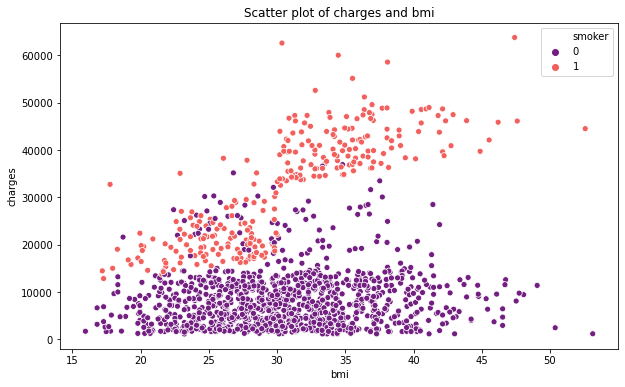

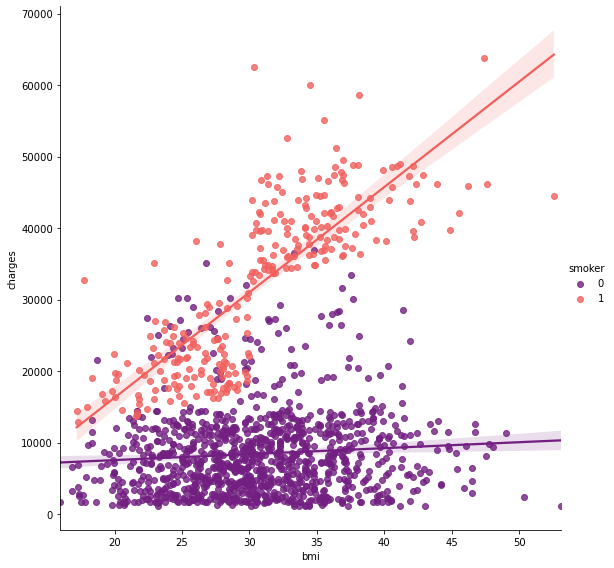

In [25]:
pl.figure(figsize=(10,6))
ax=sns.scatterplot(x='bmi',y='charges',data=data, palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x='bmi',y='charges',hue='smoker',data=data,palette='magma',size=8)

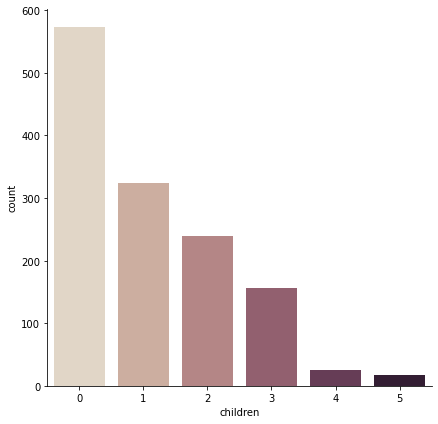

In [26]:
sns.catplot(x='children',kind='count',palette='ch:.25',data=data,size=6)

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

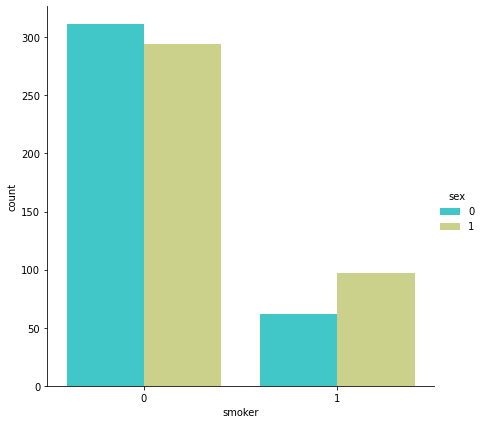

In [27]:
sns.catplot(x='smoker',kind='count',palette='rainbow',hue='sex',
           data=data[(data.children>0)],size=6)
ax.set_title('Smokers and non-smokers who have childrens')

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [29]:
x=data.drop(['charges'],axis=1)
y=data.charges

x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=0)
lr=LinearRegression().fit(x_train,y_train)

y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


In [30]:
X=data.drop(['charges','region'],axis=1)
Y=data.charges

quad=PolynomialFeatures(degree=2)
x_quad=quad.fit_transform(X)

X_train,X_test,Y_train,Y_test=train_test_split(x_quad,Y,random_state=0)

plr=LinearRegression().fit(X_train,Y_train)

Y_train_pred=plr.predict(X_train)
Y_test_pred=plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147237


In [31]:
forest=RandomForestRegressor(n_estimators=100,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(x_train,y_train)
forest_train_pred=forest.predict(x_train)
forest_test_pred=forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f'%(mean_squared_error(y_train,
                                                                     forest_train_pred),
                                                  mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f'%(r2_score(y_train,forest_train_pred),
                                                r2_score(y_test,forest_test_pred)))

MSE train data: 3729086.094, MSE test data: 19933823.142
R2 train data: 0.974, R2 test data: 0.873


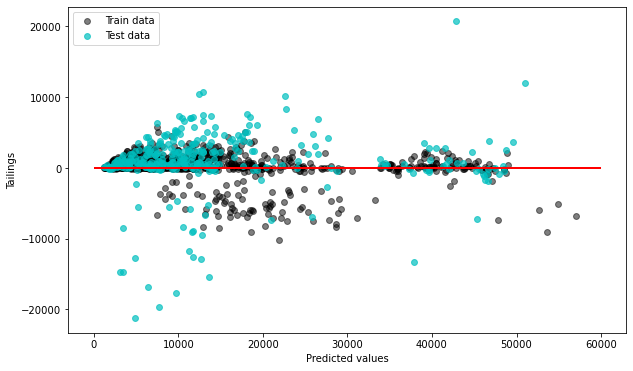

In [32]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred, forest_train_pred-y_train, c='black',marker='o',
          s=35,alpha=0.5,label='Train data')
pl.scatter(forest_test_pred,forest_test_pred-y_test,c='c',marker='o',s=35,alpha=0.7,
          label='Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc='upper left')
pl.hlines(y=0,xmin=0,xmax=60000,lw=2,color='red')
pl.show()


# 발표

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [54]:
rf=RandomForestRegressor(random_state=0,n_estimators=1000)
neg_mse_scores=cross_val_score(rf,x,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-22800402.07 -29087521.35 -19351245.02 -25136992.21 -22285862.36]
 5 교차 검증의 개별 RMSE scores :  [4774.98 5393.28 4399.01 5013.68 4720.79]
 5 교차 검증의 평균 RMSE : 4860.347


In [55]:
dt=DecisionTreeRegressor(random_state=0,max_depth=4)
neg_mse_scores=cross_val_score(dt,x,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-19586571.48 -27923320.75 -17168768.7  -24248299.95 -20202971.41]
 5 교차 검증의 개별 RMSE scores :  [4425.67 5284.25 4143.52 4924.26 4494.77]
 5 교차 검증의 평균 RMSE : 4654.495


In [56]:
gb=GradientBoostingRegressor(random_state=0,n_estimators=1000)
neg_mse_scores=cross_val_score(gb,x,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-29358644.41 -38204411.29 -23207810.22 -28245037.58 -26689236.22]
 5 교차 검증의 개별 RMSE scores :  [5418.36 6180.97 4817.45 5314.61 5166.16]
 5 교차 검증의 평균 RMSE : 5379.510


In [57]:
xgb=XGBRegressor(n_estimators=1000)
neg_mse_scores=cross_val_score(xgb,x,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-29158135.7  -36939671.26 -23478940.54 -27604987.09 -25924939.79]
 5 교차 검증의 개별 RMSE scores :  [5399.83 6077.8  4845.51 5254.04 5091.65]
 5 교차 검증의 평균 RMSE : 5333.767


In [58]:
lgb=LGBMRegressor(n_estimators=1000)
neg_mse_scores=cross_val_score(lgb,x,y,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-30245810.1  -37357259.43 -24727159.86 -29516341.57 -28431834.58]
 5 교차 검증의 개별 RMSE scores :  [5499.62 6112.06 4972.64 5432.89 5332.15]
 5 교차 검증의 평균 RMSE : 5469.873


In [59]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores=cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error',cv=5)
    rmse_scores=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_scores)
    print('#####',model.__class__.__name__,'#####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [60]:
dt_reg=DecisionTreeRegressor(random_state=0,max_depth=4)
rf_reg=RandomForestRegressor(random_state=0,n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0,n_estimators=1000)
xgb_reg=XGBRegressor(n_estimators=1000)
lgb_reg=LGBMRegressor(n_estimators=1000)

In [61]:
models=[dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, x, y)

##### DecisionTreeRegressor #####
 5 교차 검증의 평균 RMSE : 4654.495
##### RandomForestRegressor #####
 5 교차 검증의 평균 RMSE : 4860.347
##### GradientBoostingRegressor #####
 5 교차 검증의 평균 RMSE : 5379.510
##### XGBRegressor #####
 5 교차 검증의 평균 RMSE : 5333.767
##### LGBMRegressor #####
 5 교차 검증의 평균 RMSE : 5469.873


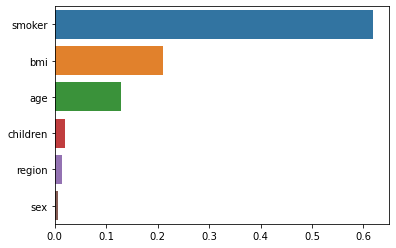

In [75]:
rf_reg=RandomForestRegressor(n_estimators=1000)
rf_reg.fit(x,y)

feature_series=pd.Series(data=rf_reg.feature_importances_, index=x.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

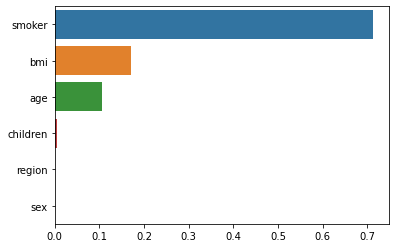

In [76]:
dt_reg=DecisionTreeRegressor(max_depth=4)
dt_reg.fit(x,y)

feature_series=pd.Series(data=dt_reg.feature_importances_, index=x.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

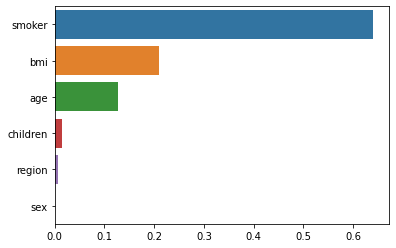

In [77]:
gb_reg=GradientBoostingRegressor(n_estimators=1000)
gb_reg.fit(x,y)

feature_series=pd.Series(data=gb_reg.feature_importances_, index=x.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

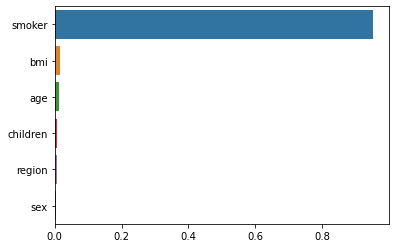

In [78]:
xgb_reg=XGBRegressor(n_estimators=1000)
xgb_reg.fit(x,y)

feature_series=pd.Series(data=xgb_reg.feature_importances_, index=x.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

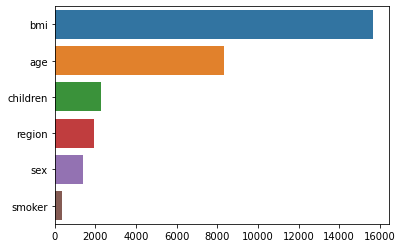

In [79]:
lgb_reg=LGBMRegressor(n_estimators=1000)
lgb_reg.fit(x,y)

feature_series=pd.Series(data=lgb_reg.feature_importances_, index=x.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

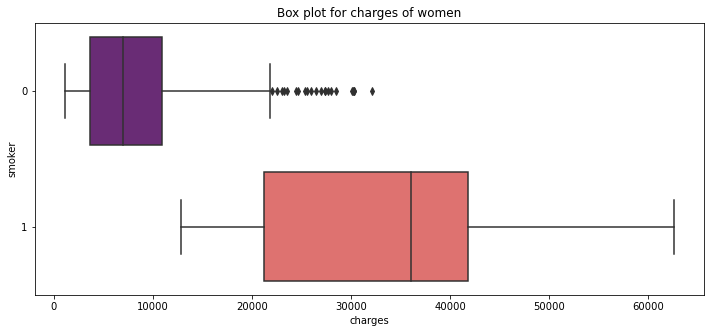

In [11]:
pl.figure(figsize=(12,5))
pl.title('Box plot for charges of women')
sns.boxplot(y='smoker',x='charges',data=data[(data.sex==1)],orient='h',palette='magma')

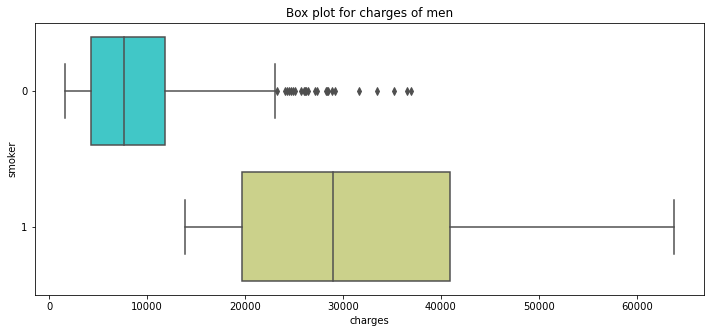

In [12]:
pl.figure(figsize=(12,5))
pl.title('Box plot for charges of men')
sns.boxplot(y='smoker',x='charges',data=data[(data.sex==0)],orient='h',palette='rainbow')

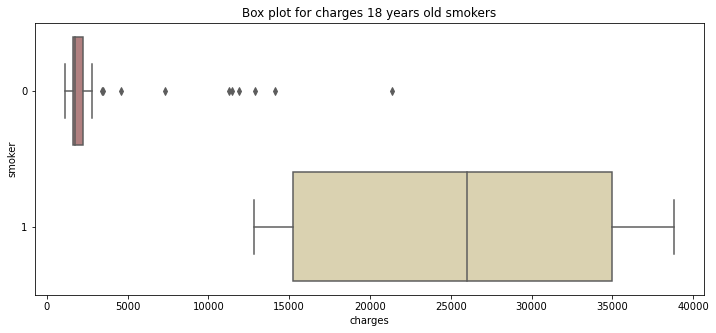

In [15]:
pl.figure(figsize=(12,5))
pl.title('Box plot for charges 18 years old smokers')
sns.boxplot(y='smoker',x='charges',data=data[(data.age==18)],orient='h',palette='pink')

In [35]:
#이상치 확인하는 함수
def outliers_iqr(data):
    q1, q3=np.percentile(data,[25,75])
    iqr=q3-q1
    lower_bound=q1-(iqr*1.5)
    upper_bound=q3+(iqr*1.5)
    
    return np.where((data>upper_bound)|(data<lower_bound))

In [63]:
women_outlier_index=outliers_iqr((data[(data['sex']==1)&(data['smoker']==0)])['charges'])[0]
men_outlier_index=outliers_iqr((data[(data['sex']==0)&(data['smoker']==0)])['charges'])[0]
smoke18_outlier_index=outliers_iqr((data[(data['age']==18)&(data['smoker']==0)])['charges'])[0]

In [64]:
data.loc[women_outlier_index,'charges']

2       4449.46200
21      4149.73600
37      2302.30000
45     20630.28351
84     39836.51900
100     6186.12700
127     9634.53800
135     2155.68150
139     2166.73200
158    36950.25670
198     9644.25250
207    20984.09360
292    42112.23560
359     1607.51010
364     3180.51010
375    18033.96790
377    38126.24650
384     8302.53565
395     7526.70645
405    11396.90020
470     2497.03830
489    10461.97940
Name: charges, dtype: float64

In [66]:
data.loc[men_outlier_index,'charges']

3      21984.47061
59      5989.52365
97     10226.28420
100     6186.12700
107     3877.30425
132    11163.56800
181     1631.82120
192     2137.65360
202    13012.20865
211     8162.71625
216    10355.64100
239     7152.67140
251    47305.30500
268     7441.05300
278    12928.79110
289    25992.82104
292    42112.23560
339     8232.63880
364     3180.51010
405    11396.90020
415     7345.72660
420    46889.26120
463    11165.41765
496     4931.64700
Name: charges, dtype: float64

In [69]:
data.loc[smoke18_outlier_index,'charges']

3     21984.47061
5      3756.62160
13    11090.71780
15     1837.23700
17     2395.17155
23    37701.87680
43     6313.75900
44     6079.67150
48    12629.89670
53    37742.57570
Name: charges, dtype: float64

In [72]:
data_outlier_index=np.concatenate((women_outlier_index,men_outlier_index,smoke18_outlier_index),axis=None)
print(len(data_outlier_index))
data_outlier_index

56


array([  2,  21,  37,  45,  84, 100, 127, 135, 139, 158, 198, 207, 292,
       359, 364, 375, 377, 384, 395, 405, 470, 489,   3,  59,  97, 100,
       107, 132, 181, 192, 202, 211, 216, 239, 251, 268, 278, 289, 292,
       339, 364, 405, 415, 420, 463, 496,   3,   5,  13,  15,  17,  23,
        43,  44,  48,  53], dtype=int64)

In [73]:
data_not_outlier_index=[]

for i in data.index:
    if i not in data_outlier_index:
        data_not_outlier_index.append(i)

In [74]:
data_clean=data.loc[data_not_outlier_index]
data_clean=data_clean.reset_index(drop=True)
data_clean

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,32,1,28.88,0,0,1,3866.8552
3,46,0,33.44,1,0,2,8240.5896
4,37,0,27.74,3,0,1,7281.5056
...,...,...,...,...,...,...,...
1282,50,1,30.97,3,0,1,10600.5483
1283,18,0,31.92,0,0,0,2205.9808
1284,18,0,36.85,0,0,2,1629.8335
1285,21,0,25.80,0,0,3,2007.9450


In [85]:
X=data_clean.drop(['charges'],axis=1)
Y=data_clean.charges

In [87]:
rf=RandomForestRegressor(random_state=0,n_estimators=1000)
neg_mse_scores=cross_val_score(rf,X,Y,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-23088993.35 -31085270.96 -19900665.82 -23285462.27 -22964289.47]
 5 교차 검증의 개별 RMSE scores :  [4805.1  5575.42 4461.02 4825.5  4792.11]
 5 교차 검증의 평균 RMSE : 4891.828


In [86]:
dt=DecisionTreeRegressor(random_state=0,max_depth=4)
neg_mse_scores=cross_val_score(dt,X,Y,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-18922369.16 -30275208.51 -18420338.98 -23114924.64 -20289609.18]
 5 교차 검증의 개별 RMSE scores :  [4349.98 5502.29 4291.89 4807.8  4504.4 ]
 5 교차 검증의 평균 RMSE : 4691.273


In [83]:
gb=GradientBoostingRegressor(random_state=0,n_estimators=1000)
neg_mse_scores=cross_val_score(gb,X,Y,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-29358644.41 -38204411.29 -23207810.22 -28245037.58 -26689236.22]
 5 교차 검증의 개별 RMSE scores :  [5418.36 6180.97 4817.45 5314.61 5166.16]
 5 교차 검증의 평균 RMSE : 5379.510


In [88]:
xgb=XGBRegressor(n_estimators=1000)
neg_mse_scores=cross_val_score(xgb,X,Y,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-30044792.27 -39072752.16 -24196374.23 -28049834.59 -28359210.37]
 5 교차 검증의 개별 RMSE scores :  [5481.31 6250.82 4918.98 5296.21 5325.34]
 5 교차 검증의 평균 RMSE : 5454.532


In [89]:
lgb=LGBMRegressor(n_estimators=1000)
neg_mse_scores=cross_val_score(lgb,X,Y,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [-29860350.46 -41185953.27 -26138408.98 -27701669.63 -29907492.01]
 5 교차 검증의 개별 RMSE scores :  [5464.46 6417.63 5112.57 5263.24 5468.77]
 5 교차 검증의 평균 RMSE : 5545.335


In [92]:
models=[dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X, Y)

##### DecisionTreeRegressor #####
 5 교차 검증의 평균 RMSE : 4691.273
##### RandomForestRegressor #####
 5 교차 검증의 평균 RMSE : 4896.472
##### GradientBoostingRegressor #####
 5 교차 검증의 평균 RMSE : 5411.410
##### XGBRegressor #####
 5 교차 검증의 평균 RMSE : 5454.532
##### LGBMRegressor #####
 5 교차 검증의 평균 RMSE : 5545.335


In [61]:
models=[dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, x, y)

##### DecisionTreeRegressor #####
 5 교차 검증의 평균 RMSE : 4654.495
##### RandomForestRegressor #####
 5 교차 검증의 평균 RMSE : 4860.347
##### GradientBoostingRegressor #####
 5 교차 검증의 평균 RMSE : 5379.510
##### XGBRegressor #####
 5 교차 검증의 평균 RMSE : 5333.767
##### LGBMRegressor #####
 5 교차 검증의 평균 RMSE : 5469.873


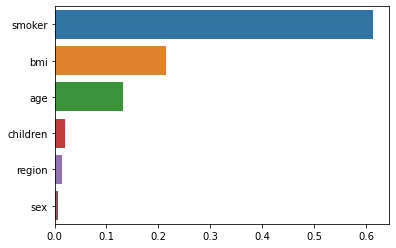

In [90]:
rf_reg=RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X,Y)

feature_series=pd.Series(data=rf_reg.feature_importances_, index=X.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

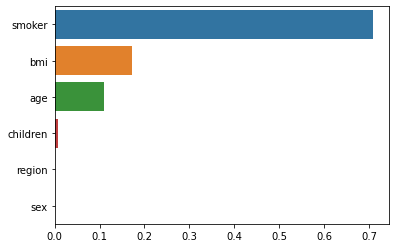

In [91]:
dt_reg=DecisionTreeRegressor(max_depth=4)
dt_reg.fit(X,Y)

feature_series=pd.Series(data=dt_reg.feature_importances_, index=X.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

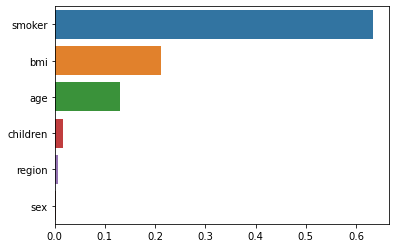

In [94]:
gb_reg=GradientBoostingRegressor(n_estimators=1000)
gb_reg.fit(X,Y)

feature_series=pd.Series(data=gb_reg.feature_importances_, index=X.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

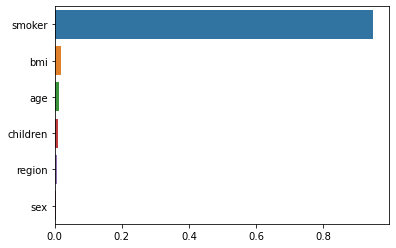

In [95]:
xgb_reg=XGBRegressor(n_estimators=1000)
xgb_reg.fit(X,Y)

feature_series=pd.Series(data=xgb_reg.feature_importances_, index=X.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

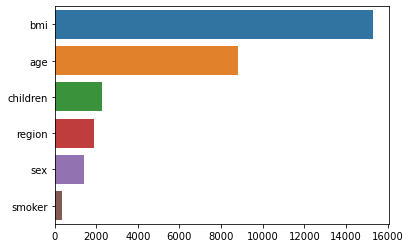

In [96]:
lgb_reg=LGBMRegressor(n_estimators=1000)
lgb_reg.fit(X,Y)

feature_series=pd.Series(data=lgb_reg.feature_importances_, index=X.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)